<a href="https://colab.research.google.com/github/angel870326/NTU_Social_Media_Analytics/blob/main/HW2/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.04.26 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Programming Assignment 2: Spectral Clustering on Star War**

### Contents

1. Read Data
2. Ratio-Cut Laplacian (L)
3. Top k Eigenvectors (Smallest Eigenvalues)
    * 3.1 Compute eigenvalues and eigenvectors
    * 3.2 Sort eigenvectors by eigenvalues (ascending)
    * 3.3 Find top 3 eigenvectors
    * 3.4 Create X̂
4. K-means
    * 4.1 Algorithm
    * 4.2 Result
    * 4.3 Visualization
5. Check if the Above Results are Correct
    * 5.1 K-means
    * 5.2 Spectral Clustering




In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np

## **1. Read Data**

Dataset 中共有 69 位 Star War 角色，分屬於三大政營

adjacent_matrix.csv:
*   描述這 69 位角色間的關係 (0 或 1)
*   header 和 index 是角色編號


In [ ]:
# Path
path = '/content/gdrive/MyDrive/碩二下/社群媒體分析/HW/HW2'

In [ ]:
matrix = pd.read_csv(os.path.join(path, 'adjacent_matrix-1.csv'), index_col = 0)
matrix

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
id = matrix.columns
print(id)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '16', '17', '18', '20', '24', '29', '31', '32', '33', '34', '35',
       '36', '37', '40', '41', '47', '55', '56', '58', '60', '61', '62', '63',
       '65', '66', '67', '71', '73', '76', '80', '81', '82', '86', '88', '89',
       '90', '92', '93', '94', '95', '96', '97', '99', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111'],
      dtype='object')


## **2. Ratio-Cut Laplacian (L)**

利用 adjacent matrix 建置 ratio-cut laplacian (L = D - A)

In [ ]:
A = matrix.to_numpy()
A

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
# Diagonal degree matrix
D = np.diag(np.sum(A, axis=1))
D

array([[17.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 17.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  5.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.]])

In [ ]:
# Laplacian matrix
L = D - A
L

array([[17., -1., -1., ...,  0.,  0.,  0.],
       [-1., 17., -1., ...,  0.,  0.,  0.],
       [-1., -1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1., -1.],
       [ 0.,  0.,  0., ..., -1.,  5., -1.],
       [ 0.,  0.,  0., ..., -1., -1.,  4.]])

## **3. Top k Eigenvectors (Smallest Eigenvalues)**


### **3.1 Compute eigenvalues and eigenvectors**

Source: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
e, v = np.linalg.eig(L)

In [ ]:
# eigenvalues
print('Eigenvalues:')
print(np.round(e, 4))

Eigenvalues:
[28.3536 27.1392 24.0988 22.9538 20.5544 20.1001 19.3654 18.5125 18.1611
 17.226  16.0339 15.8997 14.0311 14.1264 13.3342 11.2653 11.5086 10.8514
 10.6265 10.258   9.164   8.9183  8.691   8.2841  8.0768  7.8619  7.3316
  6.5622  6.1474  0.      5.6778  5.5931  5.3059  0.4727  0.6549  0.7367
  0.8043  1.1986  0.8859  0.9297  0.9539  0.9896  1.3675  4.8144  4.7577
  4.5408  4.416   4.2763  4.1919  3.8115  3.7634  3.5663  3.5012  3.0617
  2.9496  2.8868  2.6254  2.8319  2.7773  2.7115  1.6678  1.7684  2.118
  1.9542  1.      2.      5.      5.      5.    ]


In [ ]:
# eigenvectors
print('Eigenvectors:')
print(np.round(v, 4))

Eigenvectors:
[[ 0.0279 -0.0185  0.084  ...  0.      0.     -0.    ]
 [ 0.0489 -0.0818 -0.0178 ...  0.      0.     -0.    ]
 [-0.0253 -0.0349  0.011  ...  0.      0.     -0.    ]
 ...
 [ 0.0011  0.0016 -0.001  ... -0.6086 -0.7753 -0.0418]
 [ 0.0019  0.0031 -0.0018 ...  0.      0.      0.    ]
 [ 0.0011  0.0016 -0.001  ...  0.5928  0.2495 -0.0177]]


### **3.2 Sort eigenvectors by eigenvalues (ascending)**

In [ ]:
ind = e.argsort()
ind

array([29, 33, 34, 35, 36, 38, 39, 40, 41, 64, 37, 42, 60, 61, 63, 65, 62,
       56, 59, 58, 57, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43,
       68, 67, 66, 32, 31, 30, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 15, 16, 14, 12, 13, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
        0])

In [ ]:
sorted_e = e[ind[::1]]
sorted_v = v.T[ind[::1]]

### **3.3 Find top 3 eigenvectors**

In [ ]:
top_k = 3

# k smallest eigenvalues
top_e = sorted_e[:top_k]
print(np.round(top_e, 10))

# top k eigenvectors
top_v = sorted_v[:top_k]
eigen = pd.DataFrame(top_v, columns = id)
eigen

[0.         0.4727275  0.65491922]


,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,...,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386
1,-0.030371,0.021461,0.033133,-0.059563,-0.080287,-0.094750,-0.089101,-0.055608,-0.113178,-0.101323,...,0.035563,0.310957,0.035563,0.037168,0.029418,0.098921,0.630835,0.098921,0.087749,0.098921
2,-0.007693,0.013670,0.019272,-0.034807,-0.057147,-0.074879,-0.068011,-0.032708,-0.095971,-0.081160,...,0.021925,-0.050964,0.021925,0.042625,0.035818,0.095761,-0.192219,0.095761,0.085820,0.095761


In [ ]:
# Output
eigen.to_csv(os.path.join(path, "eigen.csv"), index = False, header = False)

### **3.4 Create $\hat{X}$**

最小的 eigenvalue 為 0，其 eigenvector 是一個 constant vector，可取也可不用取這個 eigenvector 來建置 $\hat{X}$（也就是只取倒數第二與第三個 eigenvector）
  

In [ ]:
X = top_v[1:].T
X

array([[-0.0303707 , -0.00769338],
       [ 0.02146138,  0.01367009],
       [ 0.03313276,  0.01927221],
       [-0.05956305, -0.03480719],
       [-0.08028724, -0.05714747],
       [-0.09475033, -0.0748792 ],
       [-0.08910148, -0.06801092],
       [-0.0556081 , -0.03270765],
       [-0.11317794, -0.09597144],
       [-0.1013229 , -0.08116022],
       [-0.11664278, -0.09990237],
       [-0.05914056, -0.03327743],
       [-0.06364148, -0.03755862],
       [-0.06547794, -0.03986689],
       [-0.06360663, -0.03740638],
       [-0.05340594, -0.02757565],
       [-0.06649858, -0.04034524],
       [-0.05574599, -0.02988463],
       [-0.01539864,  0.0045764 ],
       [-0.02516816, -0.00368916],
       [-0.06778203, -0.04026504],
       [-0.06291396, -0.03726441],
       [-0.07107653, -0.04938038],
       [-0.05786848, -0.03241436],
       [-0.06784836, -0.04228943],
       [-0.05260005, -0.02634014],
       [-0.09129203, -0.06722638],
       [-0.04650247, -0.02146909],
       [-0.06364343,

## **4. K-means**

將 $\hat{X}$ 的每個 row 視為一個角色的 representation vector，並用 k-means 將這些 vectors (角色) 分成 3 群。


### **4.1 Algorithm**

In [ ]:
def Kmeans(X: np.array, k: int, max_iter: int = 1000):
    n, d = X.shape
    
    # Randomly initialize centroids
    centroids = X[np.random.choice(n, k, replace=False), :]
    
    for i in range(max_iter):
        # Compute the distance between each data point and each centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)

        # Assign cluster (find the index of the centroid with the smallest distance)
        labels = np.argmin(distances, axis=1)
        
        # Recalculate centroids
        centroids_new = np.zeros((k, d))
        for j in range(k):
            centroids_new[j, :] = np.mean(X[labels == j, :], axis=0)
        
        # Check for convergence (if the new centroids are different from the old centroids)
        convergence = 0
        if np.allclose(centroids, centroids_new):
            convergence += 1
        if convergence >= 10:
            break

        # Update centroids
        centroids = centroids_new
    
    return centroids, labels

### **4.2 Result**

In [ ]:
k = 3
max_iter = 1000

centroids, labels = Kmeans(X, k, max_iter)
labels

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2])

In [ ]:
# Output
np.savetxt(os.path.join(path, "result.csv"), labels.reshape(1, -1), fmt='%s', delimiter=",")

### **4.3 Visualization**

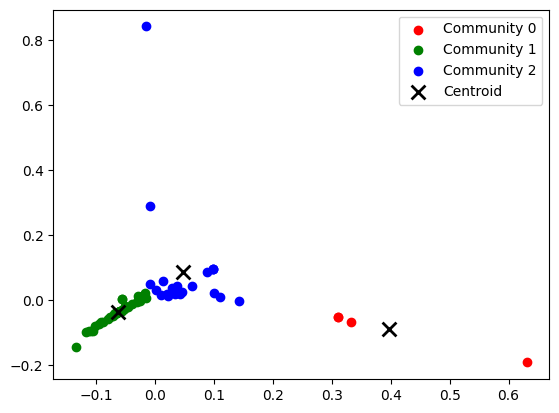

In [ ]:
import matplotlib.pyplot as plt

# Plot
colors = ['r', 'g', 'b']
plt.figure()
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Community {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidth=2, color='k', label='Centroid')
plt.legend()
plt.show()

## **5. Check if the Above Results are Correct**


### **5.1 K-means**
Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_init=10, max_iter=1000, n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int32)

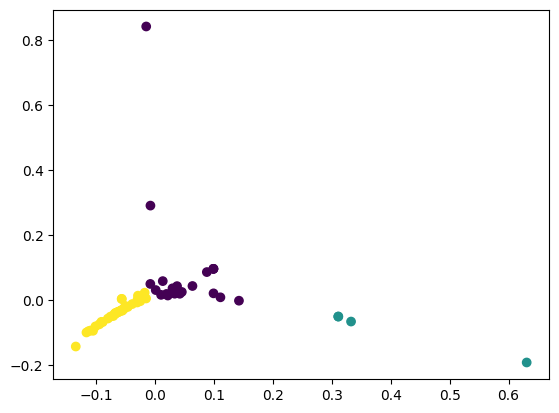

In [ ]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

### **5.2 Spectral Clustering**

Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(3, affinity='precomputed', n_init=10, assign_labels='kmeans')
pred = sc.fit_predict(A) 
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2,
       0, 0, 0], dtype=int32)

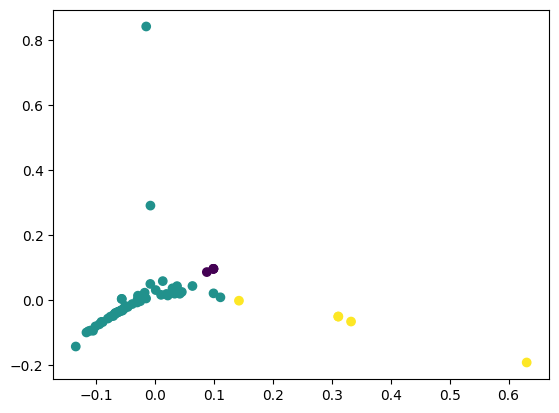

In [ ]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()